#### Correlation with Economic Variables

This notebook is designed to analyze the relationship between the sentiment indices derived from the Copom minutes and key macroeconomic variables.

* It loads the `Optimism` and `Uncertainty` indices previously generated.
* It then loads time-series data for several macroeconomic variables, including the **SELIC rate**, **IPCA**, **PTAXV**, and the **IBOV**.
* The script calculates the percentage change for the economic variables and merges them with the sentiment indices.
* A correlation matrix is computed to show the pairwise correlation coefficients between the sentiment indices (by topic) and the macroeconomic variables.
* The results are visualized using a heatmap.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

In [3]:
df_optimism = pd.read_excel("./data/processed/index_optimism.xlsx", index_col=0)
df_uncertainty = pd.read_excel("./data/processed/index_uncertainty.xlsx", index_col=0)

df_optimism = df_optimism.select_dtypes(include=['number'])
df_uncertainty = df_uncertainty.select_dtypes(include=['number'])

df_optimism.columns = [f"optimism_{i}" for i in range(len(df_optimism.columns))]
df_uncertainty.columns = [f"uncertainty_{i}" for i in range(len(df_uncertainty.columns))]

In [4]:
df_selic = pd.read_excel("./data/econ/selic.xlsx", index_col=0)
df_ipca = pd.read_excel("./data/econ/ipca(anb).xlsx", index_col=0)
df_ptaxv = pd.read_excel("./data/econ/ptaxv.xlsx", index_col=0) 
df_ibov = pd.read_excel("./data/econ/ibov.xlsx", index_col=0)

In [5]:
df_econ = pd.concat([df_selic, df_ipca, df_ptaxv, df_ibov], axis=1)
df_econ = df_econ.pct_change().dropna()


In [6]:
df_full = pd.concat([df_econ, df_optimism, df_uncertainty], axis=1)
df_full.dropna(inplace=True)

In [7]:
corr_matrix = df_full.corr()

drop_columns_factors = df_optimism.columns.to_list()+df_uncertainty.columns.to_list()
corr_matrix = corr_matrix.drop(drop_columns_factors, axis=0)
corr_matrix = corr_matrix.drop(["SELIC", "IPCA (anb)", "PTAXV", "IBOV"], axis=1)

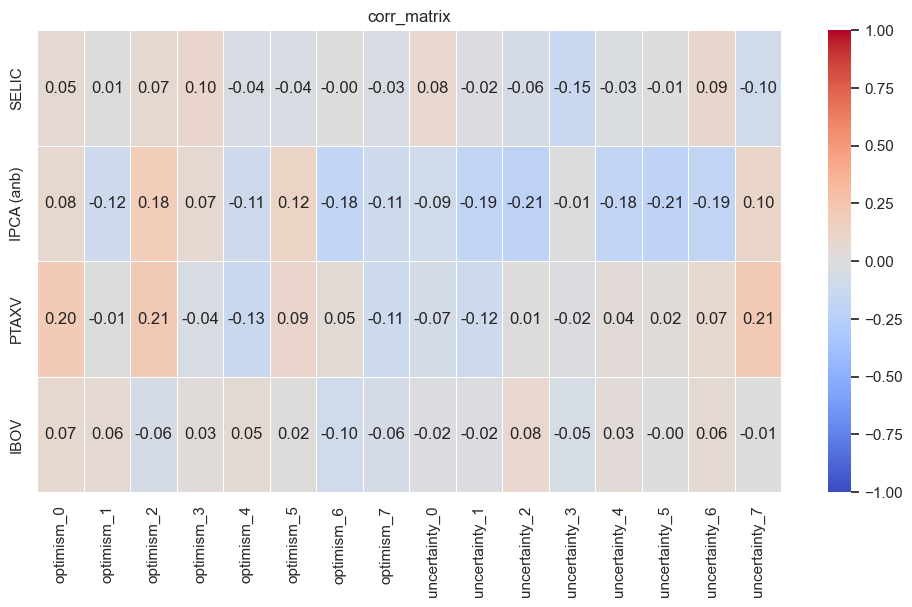

In [8]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    corr_matrix, 
    annot=True,     
    fmt=".2f",      
    cmap='coolwarm',
    linewidths=.5,
    vmin=-1,
    vmax=1 
)
plt.title('corr_matrix')
plt.show()